In [25]:
import pandas as pd

import datafoobars as dfb

In [26]:
old_raw_data = dfb.import_train_data()

old_raw_data.shape

(87642, 65)

In [27]:
old_raw_data["Position"] = dfb.extract_positions(old_raw_data)

old_raw_data = dfb.drop_positions(old_raw_data, ["RES", "SUB"])

old_raw_data = dfb.drop_personal_data(old_raw_data)
old_raw_data = dfb.drop_goalkeeper_data(old_raw_data)
old_raw_data = dfb.drop_categorical_data(old_raw_data, dropposition=False)
old_raw_data.drop("Overall", axis=1, inplace=True)
old_raw_data.dropna(inplace=True)
old_raw_data.shape

(31115, 29)

In [28]:
old_raw_data["Position"] = dfb.map_positions(old_raw_data["Position"])

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

X = old_raw_data.drop("Position", axis=1)
y = old_raw_data["Position"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred = rfc.predict(X_test)

rfc_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Defender       0.92      0.95      0.93      2430
  Midfielder       0.85      0.88      0.86      2628
     Striker       0.87      0.75      0.81      1165

    accuracy                           0.88      6223
   macro avg       0.88      0.86      0.87      6223
weighted avg       0.88      0.88      0.88      6223


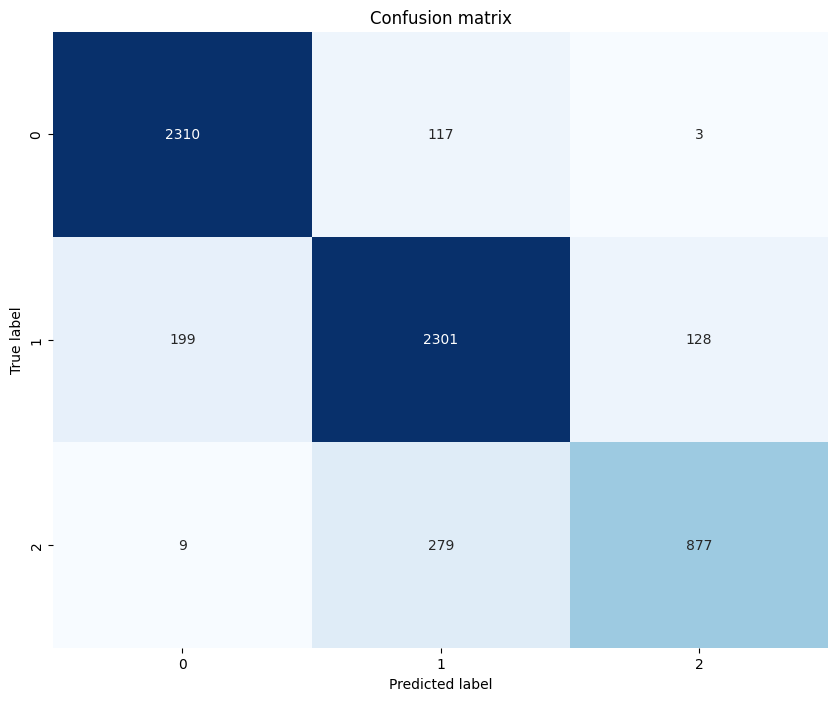

In [32]:
dfb.make_conf_matrix(y_test, y_pred)

In [33]:
pred_data = pd.read_csv("data/FIFA22_official_data.csv")

pred_data["Position"] = dfb.extract_positions(pred_data)

pred_data = dfb.drop_positions(pred_data, ["SUB", "RES"])

pred_data = dfb.drop_personal_data(pred_data)
pred_data = dfb.drop_goalkeeper_data(pred_data)
pred_data = dfb.drop_categorical_data(pred_data, dropposition=False)
pred_data.drop("Overall", axis=1, inplace=True)

pred_data.dropna(inplace=True)
pred_data.shape

(6133, 29)

In [34]:
pred_data["Position"] = dfb.map_positions(pred_data["Position"])

In [35]:
X = pred_data.drop("Position", axis=1)
y = pred_data["Position"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [36]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Defender       0.88      0.93      0.90       596
  Midfielder       0.81      0.78      0.79       621
     Striker       0.78      0.77      0.78       317

    accuracy                           0.83      1534
   macro avg       0.82      0.82      0.82      1534
weighted avg       0.83      0.83      0.83      1534


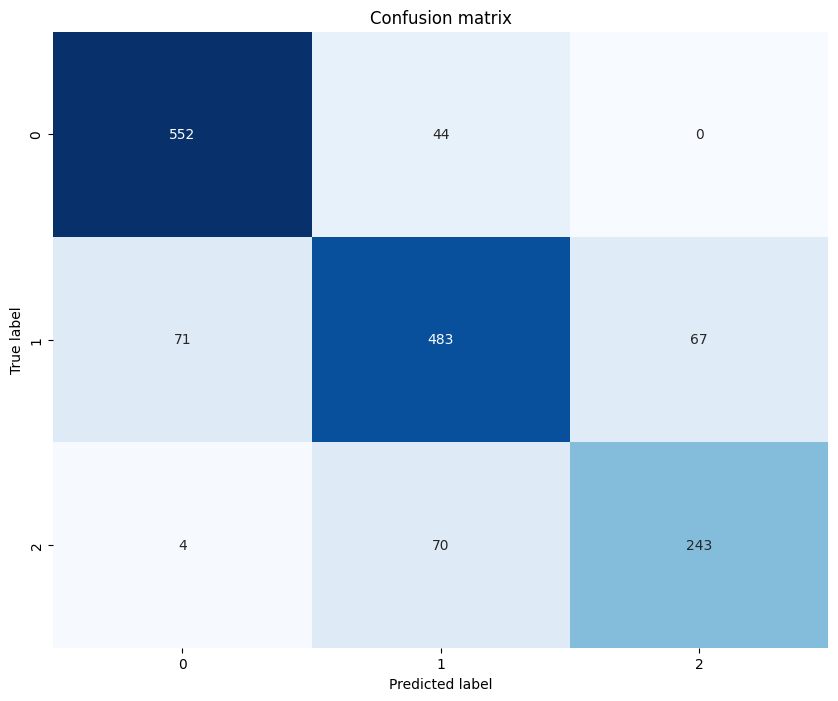

In [38]:
dfb.make_conf_matrix(y_test, y_pred)